In [289]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df =pd.read_csv('/Users/mac/finalDataset.csv')
df

,Unnamed: 0,Mileage,Model Year,Brand,Model,Nombre de portes,Origine,Première main,Fuel type,Fiscal power,boiteVitesse,Price
0,0,90 000 - 94 999,2012,Peugeot,206+,5.0,WW au Maroc,Non,Essence,6 CV,Manuelle,60000.0
1,1,25 000 - 29 999,2011,Peugeot,Partner,NaN,NaN,NaN,Diesel,7 CV,Manuelle,62000.0
2,2,250 000 - 299 999,2010,Dacia,Sandero,5.0,NaN,Non,Diesel,6 CV,Manuelle,65000.0
3,3,200 000 - 249 999,2008,Volkswagen,Touareg,5.0,WW au Maroc,Non,Diesel,12 CV,Automatique,NaN
4,4,150 000 - 159 999,2008,Daihatsu,Sirion,NaN,NaN,NaN,Essence,--,--,48000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64852,51129,NaN,2001,NaN,NaN,NaN,NaN,NaN,Diesel,9 CV,NaN,83000.0
64853,51130,10000-14999,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0
64854,51131,NaN,2007,NaN,NaN,NaN,NaN,NaN,Diesel,10 CV,NaN,120000.0
64855,51132,0-4999,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500.0


In [291]:
df.shape

(64857, 12)

In [292]:
df.describe()

,Unnamed: 0,Nombre de portes,Price
count,64857.000000,33283.000000,6.169700e+04
mean,21608.629971,4.872788,8.794606e+04
std,15280.075352,0.488107,1.397026e+05
min,0.000000,3.000000,2.000000e+02
25%,8107.000000,5.000000,4.500000e+04
50%,18705.000000,5.000000,6.800000e+04
75%,34919.000000,5.000000,1.050000e+05
max,51133.000000,5.000000,1.900000e+07


In [293]:
print(df.isnull().sum())

Unnamed: 0              0
Mileage                10
Model Year              5
Brand                  18
Model                  18
Nombre de portes    31574
Origine             33010
Première main       34638
Fuel type              12
Fiscal power         9288
boiteVitesse        35874
Price                3160
dtype: int64


In [294]:
df['Nombre de portes'].fillna(df['Nombre de portes'].max(), inplace=True)

In [295]:
df['Fiscal power'].fillna(df['Fiscal power'].mode()[0],inplace=True)
df['Fuel type'].fillna(df['Fuel type'].mode()[0], inplace=True)
df['Mileage'].fillna(df['Mileage'].mode()[0], inplace=True)
df.dropna(subset=['Brand', 'Model', 'Model Year'], inplace=True)
df.drop(['Origine', 'Première main', 'boiteVitesse'], axis=1, inplace=True)
df['Price'].interpolate(method='linear', inplace=True)

In [296]:
print(df.isnull().sum())

Unnamed: 0          0
Mileage             0
Model Year          0
Brand               0
Model               0
Nombre de portes    0
Fuel type           0
Fiscal power        0
Price               0
dtype: int64


In [298]:
df['Price'] = df['Price'].astype(int)
df['Nombre de portes'] = df['Nombre de portes'].astype(int)

In [299]:
df

,Unnamed: 0,Mileage,Model Year,Brand,Model,Nombre de portes,Fuel type,Fiscal power,Price
0,0,90 000 - 94 999,2012,Peugeot,206+,5,Essence,6 CV,60000
1,1,25 000 - 29 999,2011,Peugeot,Partner,5,Diesel,7 CV,62000
2,2,250 000 - 299 999,2010,Dacia,Sandero,5,Diesel,6 CV,65000
3,3,200 000 - 249 999,2008,Volkswagen,Touareg,5,Diesel,12 CV,56500
4,4,150 000 - 159 999,2008,Daihatsu,Sirion,5,Essence,--,48000
...,...,...,...,...,...,...,...,...,...
64841,51118,70000-74999,2015,Jeep,Grand Cherokee,5,Diesel,12 CV,320000
64842,51119,110000-119999,2013,Mercedes-Benz,Classe E,5,Diesel,12 CV,220000
64843,51120,300000-349999,2002,Renault,Clio,5,Diesel,7 CV,50000
64844,51121,35000-39999,2017,Volkswagen,Caddy,5,Diesel,6 CV,210000


In [300]:
economic_range = (100000, 500000)
mid_range = (500000, 2000000)
luxury_range = (2000000, np.inf)

def assign_segment_label(price):
    if economic_range[0] <= price <= economic_range[1]:
        return 'economic'
    elif mid_range[0] <= price <= mid_range[1]:
        return 'mid-range'
    elif luxury_range[0] <= price:
        return 'luxury'
    else:
        return 'economic'

df['Segment'] = df['Price'].apply(assign_segment_label)

In [267]:
from sklearn.preprocessing import LabelEncoder

In [301]:
categorical_columns = ['Brand', 'Model', 'Fiscal power', 'Fuel type', 'Mileage', 'Model Year']
numerical_columns = ['Price', 'Nombre de portes']

label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [302]:
df

,Unnamed: 0,Mileage,Model Year,Brand,Model,Nombre de portes,Fuel type,Fiscal power,Price,Segment
0,0,68,56,49,33,0.183717,2,34,-0.212425,economic
1,1,30,54,49,568,0.183717,0,35,-0.197858,economic
2,2,31,52,17,660,0.183717,0,34,-0.176006,economic
3,3,27,48,62,728,0.183717,0,3,-0.237919,economic
4,4,15,48,19,692,0.183717,2,0,-0.299831,economic
...,...,...,...,...,...,...,...,...,...,...
64841,51118,61,62,34,411,0.183717,0,3,1.681370,economic
64842,51119,7,58,45,281,0.183717,0,3,0.952988,economic
64843,51120,37,36,52,293,0.183717,0,35,-0.285264,economic
64844,51121,40,66,62,254,0.183717,0,34,0.880149,economic


In [303]:
X = df[['Mileage', 'Model Year', 'Price']].values

In [304]:
wcss = []
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

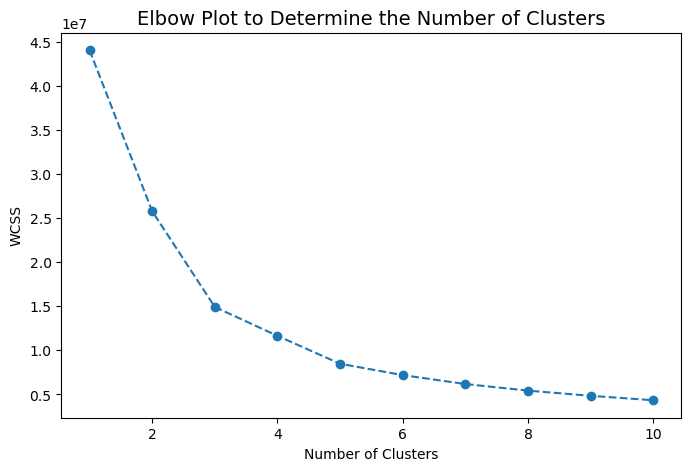

In [305]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'o--')
plt.title('Elbow Plot to Determine the Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [306]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y = kmeans.fit_predict(X)

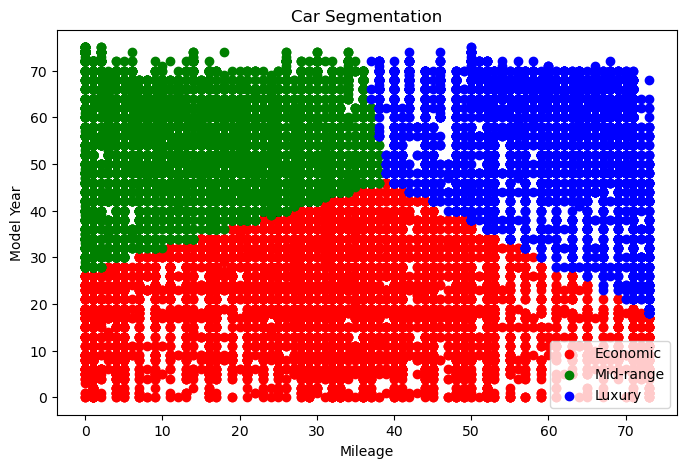

In [307]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Economic')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='green', label='Mid-range')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='blue', label='Luxury')
plt.xlabel('Mileage')
plt.ylabel('Model Year')
plt.title('Car Segmentation')
plt.legend()
plt.show()

In [308]:
X = df.iloc[:, :-1]  
y = df['Segment']  

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

In [329]:
print("KNN Accuracy:", knn_accuracy)
print("KNN F1 Score:", knn_f1)

KNN Accuracy: 0.9949105490438002
KNN F1 Score: 0.9925174703996213


In [330]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

In [331]:
print("SVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.9947563232572486
SVM F1 Score: 0.9921413769923076


In [332]:
if knn_accuracy > svm_accuracy and knn_f1 > svm_f1:
    print("KNN performs the best.")
elif svm_accuracy > knn_accuracy and svm_f1 > knn_f1:
    print("SVM performs the best.")
else:
    print("Both models have similar performance.")

KNN performs the best.
